<a href="https://www.kaggle.com/code/karthikgkumar/incomecategorizer-subsidy-allocation-system?scriptVersionId=140598992" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# IncomeCategorizer: Equitable Subsidy Allocation System

## Problem Statement 
<strong>Subsidy Inc.</strong> is faced with the challenge of accurately determining the income of individuals in order to deliver subsidies. Obtaining precise income data is a complex task worldwide. However, Subsidy Inc. has acquired a substantial dataset comprising authenticated information on individual income, demographic factors, and select financial parameters.
<br/>
To address this issue, Subsidy Inc. aims to develop an <strong> income classifier system </strong>capable of accurately categorizing individuals based on their income levels. This system will leverage the available dataset to make reliable predictions and enable the efficient delivery of subsidies to those who qualify.
<br/>
By developing an effective income classifier system, Subsidy Inc. aims to enhance the accuracy and efficiency of their subsidy allocation process. This will empower them to allocate subsidies more equitably and ensure that individuals receive the appropriate financial assistance based on their income levels 

|Variables|Data Type| Description | Categories of variables |
|---------|----------|------------|-------------------------|
|age      |integer   |The age of individual in years| __    |
|JobType  |string    |Working status of a person, which sector does he work on|Federal-gov,Local-gov & 6 more|
|EdType   |string    |The level of edcation|10th, Masters & 14 more|
|maritalstatus|string|The marital status of the individual|Divorced,Never-married & 5 more|
|occupation|string|The type of work the inddividual does|Armed-Forces,Sales & 12 more|
|relationship|string|Relationship of individual to his/her household|Husband,wife & 4 more|
|race      |string   |The individual's race     | Black, White & 3 more|
|gender    |string   |The individual's gender   |Male,Female|
|capitalgain|integer | The capital gains of the individual(from selling an asset such as stock or bond for less than the original purchase price )|__|
|capitalloss|integer |The capital losses of the individual (from selling an asset such as a stock or bond for less than the purchase price)|__|
|hoursperweek|integer|The number of hours the individual works per week|__|
|nativecountry|string|The native country of an individual|United-States,Canada & 40 more|
|salstat    |string  |The outcome variable indicating whether a person's salary status|less than or equal to 50,000, greater than 50,000|

### Classifying Personal Income

In [1]:
#To work with dataframes
import pandas as pd
#To perform numerical operations
import numpy as np
#To visualise data
import seaborn as sns
#To partition the data
from sklearn.model_selection import train_test_split
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression
#importing performance metrics- accuracy & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Import the data
Income_data=pd.read_csv("/kaggle/input/Income/income.csv")
#Creating a copy of original data
Income_data_copy=Income_data.copy()
#size of dataframe
Income_data.shape

(32561, 13)

## Exploratory Data Analysis
1. Getting to know data
2. Data Preprocessing
3. Cross Tables and Data Visualisation

In [3]:
#To check datatype of variables
print("Information of Data\n")
Income_data.info()

Information of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   JobType        32561 non-null  object
 2   EdType         32561 non-null  object
 3   maritalstatus  32561 non-null  object
 4   occupation     32561 non-null  object
 5   relationship   32561 non-null  object
 6   race           32561 non-null  object
 7   gender         32561 non-null  object
 8   capitalgain    32561 non-null  int64 
 9   capitalloss    32561 non-null  int64 
 10  houseperweek   32561 non-null  int64 
 11  nativecountry  32561 non-null  object
 12  salstat        32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [4]:
#To check for missing values
Income_data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
houseperweek     0
nativecountry    0
salstat          0
dtype: int64

Inference is that there are no missing values in the data Set

In [5]:
#Summary of numerical variables
Income_data.describe()

,age,capitalgain,capitalloss,houseperweek
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [6]:
#Summary of Categorical Variables
Income_data.describe(include="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,salstat
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
#Frequency of each categories
print(Income_data['JobType'].value_counts())
#Frequency of each categories
print(Income_data['EdType'].value_counts())
#Frequency of each categories
print(Income_data['maritalstatus'].value_counts())
#Frequency of each categories
print(Income_data['relationship'].value_counts())
#Frequency of each categories
print(Income_data['race'].value_counts())
#Frequency of each categories
print(Income_data['gender'].value_counts())
#Frequency of each categories
print(Income_data['nativecountry'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: EdType, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 

In [8]:
Income_data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
#Checking for unique classes
np.unique(Income_data["JobType"])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [10]:
#Checking for unique classes
np.unique(Income_data["occupation"])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [11]:
#There exists '?' instead of nan
Income_data=pd.read_csv('/kaggle/input/Income/income.csv',na_values=[" ?"])
#Checking for missing values
Income_data.isna().sum()

age                 0
JobType          1836
EdType              0
maritalstatus       0
occupation       1843
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
houseperweek        0
nativecountry     583
salstat             0
dtype: int64

In [12]:
#Subsetting all columns with missing values
missing=Income_data[Income_data.isnull().any(axis=1)]
missing.shape
print(missing)

       age   JobType         EdType           maritalstatus      occupation  \
14      40   Private      Assoc-voc      Married-civ-spouse    Craft-repair   
27      54       NaN   Some-college      Married-civ-spouse             NaN   
38      31   Private   Some-college      Married-civ-spouse           Sales   
51      18   Private        HS-grad           Never-married   Other-service   
61      32       NaN        7th-8th   Married-spouse-absent             NaN   
...    ...       ...            ...                     ...             ...   
32530   35       NaN      Bachelors      Married-civ-spouse             NaN   
32531   30       NaN      Bachelors           Never-married             NaN   
32539   71       NaN      Doctorate      Married-civ-spouse             NaN   
32541   41       NaN        HS-grad               Separated             NaN   
32542   72       NaN        HS-grad      Married-civ-spouse             NaN   

         relationship                 race   gender

### Inference
1. Missing Values in JobType = 1809
2. Missing Values in Occupation= 1816
3. There are 1809 rows where two specific columns i.e. occupation & JobType have missing values.
4. 1816-1809=7 -> You still have occupation unfilled for these 7 rows. Because JobType is never worked.

In [13]:
Income_data_2= Income_data.dropna(axis=0)   
Income_data_2.shape

(30162, 13)

In [14]:
#Relation between independent variables
correlation=Income_data_2.select_dtypes(exclude=[object]).corr()
# correlation=Income_data_2(exclude=[object]).corr()
print(correlation)

                   age  capitalgain  capitalloss  houseperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
houseperweek  0.101599     0.080432     0.052417      1.000000


In [15]:
#Crosstables and Data Visualisation
Income_data_2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'houseperweek', 'nativecountry', 'salstat'],
      dtype='object')

In [16]:
#Gender Proportion Table
gender= pd.crosstab(index=Income_data_2["gender"],columns='count',normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [17]:
#Gender vs Salary Status
gender_salstat = pd.crosstab(
    index=Income_data_2['gender'],
    columns=Income_data_2['salstat'],
    normalize='index',
    margins=True
)
print(gender_salstat)

salstat     <=50K      >50K
gender                     
 Female  0.886322  0.113678
 Male    0.686163  0.313837
All      0.751078  0.248922


<Axes: xlabel='salstat', ylabel='count'>

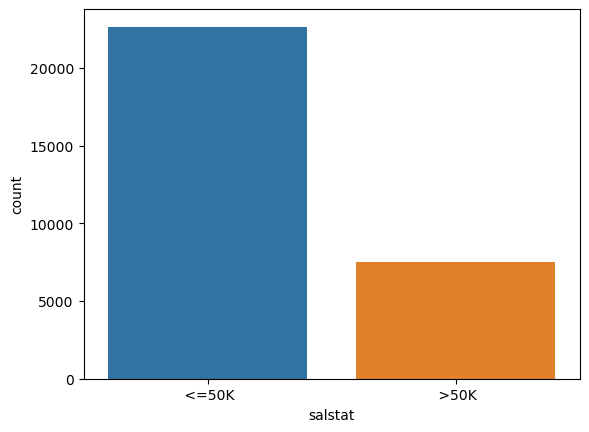

In [18]:
#Frequency Distribution of Salary Status
sns.countplot(x='salstat', data=Income_data_2)

- 75% of people's salary status is less than or equal to 50k
- 25% people's salary are more than 50k

<Axes: xlabel='age', ylabel='Count'>

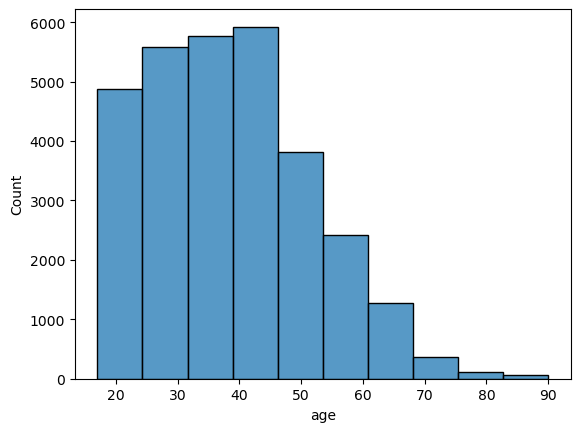

In [19]:
#histogram of age
sns.histplot(Income_data_2['age'],bins=10,kde=False)

- People with age 20-45 are high in frequency

In [20]:
#Box Plot- Age v/s Salary status
Income_data_2.columns


Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'houseperweek', 'nativecountry', 'salstat'],
      dtype='object')

<Axes: xlabel='count', ylabel='JobType'>

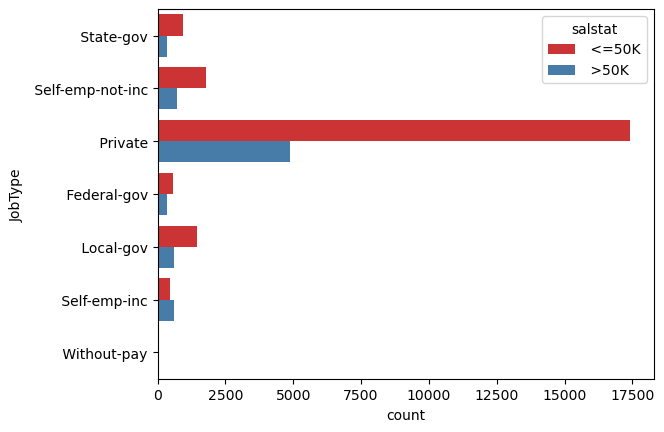

In [21]:
#Job Type v/s Salary Status
sns.countplot(y=Income_data_2['JobType'], hue=Income_data_2['salstat'], data=Income_data_2, palette='Set1')

In [22]:
pd.crosstab(index=Income_data_2['JobType'], columns=Income_data_2['salstat'],normalize='index')

salstat,<=50K,>50K
JobType,,
Federal-gov,0.612937,0.387063
Local-gov,0.705370,0.294630
Private,0.781208,0.218792
Self-emp-inc,0.441341,0.558659
Self-emp-not-inc,0.714286,0.285714
State-gov,0.731040,0.268960
Without-pay,1.000000,0.000000


- From the above table, it is visible that 56% of self employed people earn more than 50k USD per year.
- Hence an important variable in avoiding the misuse of subsidies

<Axes: xlabel='count', ylabel='EdType'>

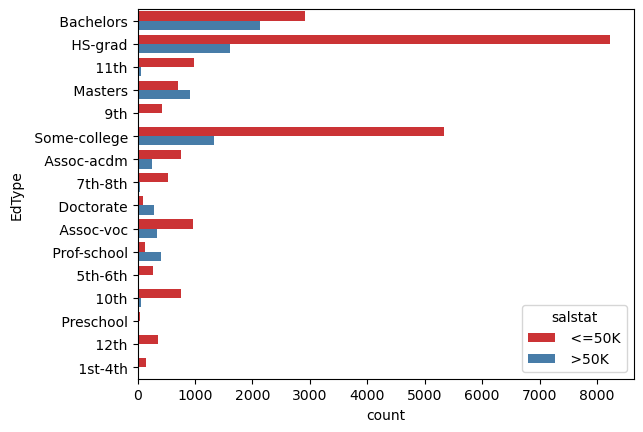

In [23]:
#Education v/s salary status
sns.countplot(y=Income_data_2['EdType'], hue=Income_data_2['salstat'], data=Income_data_2, palette='Set1')

In [24]:
pd.crosstab(index=Income_data_2['EdType'], columns=Income_data_2['salstat'],normalize='index')

salstat,<=50K,>50K
EdType,,
10th,0.928049,0.071951
11th,0.943702,0.056298
12th,0.923077,0.076923
1st-4th,0.960265,0.039735
5th-6th,0.958333,0.041667
7th-8th,0.937163,0.062837
9th,0.945055,0.054945
Assoc-acdm,0.746032,0.253968
Assoc-voc,0.736802,0.263198


- From the above table, we can see that people who have done Doctorate, Masters, Prof-School are more likely to earn above 50k USD per year when compared with others.
- Hence an important variable in avoiding subsidies.

<Axes: xlabel='count', ylabel='occupation'>

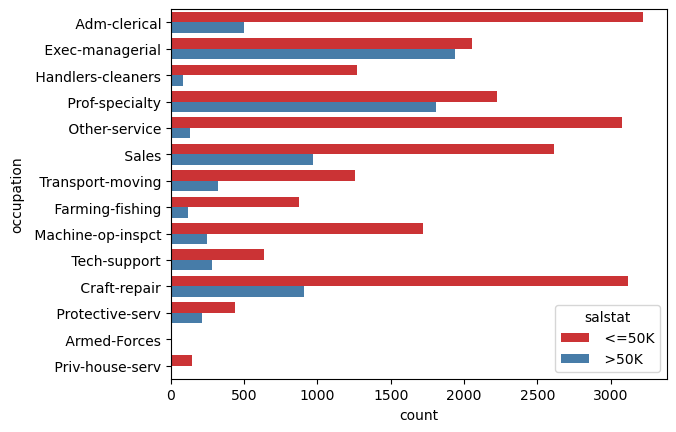

In [25]:
#Education v/s salary status
sns.countplot(y=Income_data_2['occupation'], hue=Income_data_2['salstat'], data=Income_data_2, palette='Set1')

In [26]:
pd.crosstab(index=Income_data_2['occupation'], columns=Income_data_2['salstat'],normalize='index')

salstat,<=50K,>50K
occupation,,
Adm-clerical,0.866165,0.133835
Armed-Forces,0.888889,0.111111
Craft-repair,0.774690,0.225310
Exec-managerial,0.514780,0.485220
Farming-fishing,0.883721,0.116279
Handlers-cleaners,0.938519,0.061481
Machine-op-inspct,0.875381,0.124619
Other-service,0.958904,0.041096
Priv-house-serv,0.993007,0.006993


- Those who make more than 50k USD per year are more likely to work as managers and professionals.
- Hence an important variable in avoiding the misuse of subsidies.

<Axes: xlabel='capitalgain', ylabel='Count'>

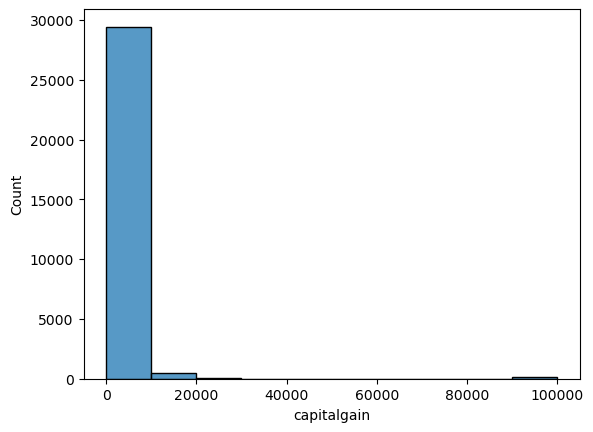

In [27]:
sns.histplot(Income_data_2['capitalgain'],kde=False,bins=10)

- 92% of capital gain is 0.

<Axes: xlabel='capitalloss', ylabel='Count'>

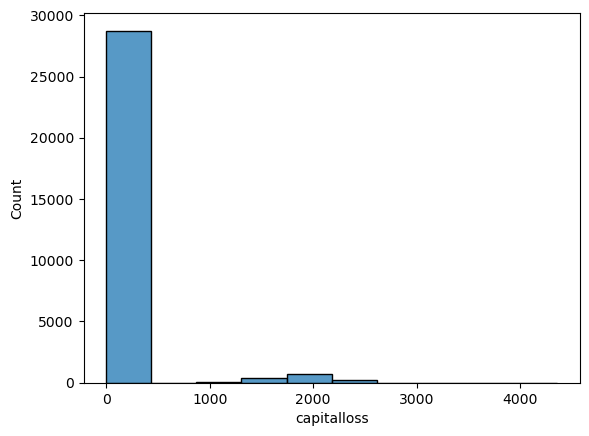

In [28]:
sns.histplot(Income_data_2['capitalloss'],kde=False,bins=10)

- 95% of capital loss is 0.

<Axes: xlabel='salstat', ylabel='houseperweek'>

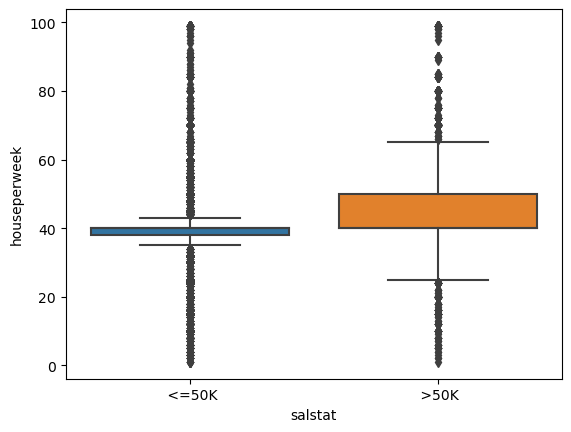

In [29]:
#Hours per week v/s Salary status
sns.boxplot(x=Income_data_2['salstat'],y=Income_data_2['houseperweek'])


- From the plot, it's clearly visible that those who make more than 50k USD per year are more likely to spend 40-50 hours per week.

## Logistic Regression

In [30]:
Income_data_2['salstat']=Income_data_2['salstat'].map({" <=50K":0," >50K":1})

print(Income_data_2['salstat'])

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salstat, Length: 30162, dtype: int64


/tmp/ipykernel_20/4091793246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Income_data_2['salstat']=Income_data_2['salstat'].map({" <=50K":0," >50K":1})


In [31]:
new_data=pd.get_dummies(Income_data_2, drop_first=True)
print(new_data)

       age  capitalgain  capitalloss  houseperweek  salstat  \
0       39         2174            0            40        0   
1       50            0            0            13        0   
2       38            0            0            40        0   
3       53            0            0            40        0   
4       28            0            0            40        0   
...    ...          ...          ...           ...      ...   
32556   27            0            0            38        0   
32557   40            0            0            40        1   
32558   58            0            0            40        0   
32559   22            0            0            20        0   
32560   52        15024            0            40        1   

       JobType_ Local-gov  JobType_ Private  JobType_ Self-emp-inc  \
0                       0                 0                      0   
1                       0                 0                      0   
2                       0        

In [32]:
#Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'houseperweek', 'salstat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [33]:
#Separating the input names from data
features=list(set(columns_list)-set(['salstat']))
print(features)

['nativecountry_ Honduras', 'nativecountry_ Yugoslavia', 'relationship_ Wife', 'nativecountry_ China', 'EdType_ 11th', 'occupation_ Machine-op-inspct', 'maritalstatus_ Married-AF-spouse', 'occupation_ Transport-moving', 'nativecountry_ Ecuador', 'nativecountry_ Hong', 'nativecountry_ Laos', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ United-States', 'maritalstatus_ Widowed', 'nativecountry_ France', 'nativecountry_ Vietnam', 'race_ Other', 'nativecountry_ Dominican-Republic', 'occupation_ Tech-support', 'nativecountry_ South', 'nativecountry_ Haiti', 'EdType_ 9th', 'EdType_ Some-college', 'EdType_ 1st-4th', 'occupation_ Craft-repair', 'EdType_ 5th-6th', 'EdType_ Assoc-acdm', 'nativecountry_ Italy', 'maritalstatus_ Married-civ-spouse', 'JobType_ Private', 'occupation_ Sales', 'nativecountry_ Philippines', 'JobType_ Self-emp-inc', 'race_ Asian-Pac-Islander', 'occupation_ Farming-fishing', 'nativecountry_ Thailand', 'maritalstatus_ Never-married', 'nativecountry_ Taiwan',

In [34]:
#Storing the output values in y
y=new_data['salstat'].values
print(y)

[0 0 0 ... 0 0 1]


In [35]:
#Storing the input values in x
x= new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [36]:
#Splitting the data into test and train data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)

In [37]:
#Make an instance of model
logistic=LogisticRegression()

In [38]:
#Fitting values of x and y
logistic.fit(train_x,train_y)
logistic.coef_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-7.01360358e-03, -4.40232859e-03,  3.82325972e-01,
        -6.32132143e-02, -5.84033487e-01, -6.03632327e-01,
         6.14660143e-02, -3.07288411e-01, -1.93498298e-02,
        -1.53050384e-02, -2.12341241e-02, -1.01542774e-02,
        -2.98891449e-01, -1.34520518e-01,  1.86457209e-02,
        -7.94250295e-02, -2.32714785e-01, -6.53312759e-02,
         4.01659816e-01, -9.68398327e-02, -3.24622206e-02,
        -4.51272090e-01, -2.82854890e-01, -1.81052127e-01,
        -1.05246785e-01, -3.36128084e-01, -2.07063922e-01,
         3.73156084e-02,  1.13981166e+00, -3.06534827e-01,
         3.77533793e-01, -4.50986641e-02,  1.12621729e-01,
        -3.72625716e-01, -8.32918577e-01, -8.97848775e-03,
        -1.42168844e+00, -1.02299825e-02, -9.54638028e-03,
         3.48374928e-01, -3.45825210e-02, -3.42256564e-03,
        -1.89857409e-02, -1.06098358e+00, -2.21762327e-02,
        -3.37143626e-01, -6.46886665e-01,  8.15209891e-01,
        -4.79606843e-03, -1.79447476e-03,  8.07983266e-0

In [39]:
#Prediction from test data
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [40]:
#Confusion matrix
confusion_matrix_1=confusion_matrix(test_y,prediction)
print(confusion_matrix_1)

[[6275  494]
 [ 879 1401]]


In [41]:
#Calculating the accuracy
accuracy_score_1=accuracy_score(test_y,prediction)
print(accuracy_score_1)

0.8482705271300697


In [42]:
#Print the misclassified values from prediction
print("Misclassified Samples: %d" %(test_y!=prediction).sum())

Misclassified Samples: 1373


In [43]:
print(Income_data_2['salstat'])

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salstat, Length: 30162, dtype: int64


In [44]:
#Logistic Refression- Removing Insignificant Variables
cols=['gender','nativecountry','race','JobType']
new_data=Income_data_2.drop(cols,axis=1)
new_data=pd.get_dummies(new_data,drop_first=True)

In [45]:
#Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'houseperweek', 'salstat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [46]:
features=list(set(columns_list)-set(['salstat']))
print(features)

['age', 'relationship_ Wife', 'occupation_ Machine-op-inspct', 'EdType_ 11th', 'maritalstatus_ Married-AF-spouse', 'occupation_ Transport-moving', 'EdType_ Prof-school', 'EdType_ Assoc-voc', 'occupation_ Priv-house-serv', 'capitalloss', 'maritalstatus_ Widowed', 'maritalstatus_ Married-spouse-absent', 'relationship_ Not-in-family', 'EdType_ Preschool', 'occupation_ Protective-serv', 'occupation_ Tech-support', 'EdType_ 9th', 'EdType_ 1st-4th', 'EdType_ Some-college', 'relationship_ Own-child', 'occupation_ Craft-repair', 'EdType_ 5th-6th', 'EdType_ Assoc-acdm', 'EdType_ 12th', 'capitalgain', 'maritalstatus_ Married-civ-spouse', 'occupation_ Handlers-cleaners', 'occupation_ Other-service', 'occupation_ Exec-managerial', 'occupation_ Sales', 'occupation_ Armed-Forces', 'occupation_ Prof-specialty', 'occupation_ Farming-fishing', 'maritalstatus_ Never-married', 'EdType_ Bachelors', 'houseperweek', 'relationship_ Other-relative', 'relationship_ Unmarried', 'EdType_ HS-grad', 'EdType_ Maste

In [47]:
#Storing the output values
y=new_data['salstat'].values
print(y)

[0 0 0 ... 0 0 1]


In [48]:
#Storing the input values
x=new_data[features].values
print(x)

[[39  0  0 ...  0  0  0]
 [50  0  0 ...  0  0  0]
 [38  0  0 ...  0  0  0]
 ...
 [58  0  0 ...  0  0  0]
 [22  0  0 ...  0  0  0]
 [52  1  0 ...  0  0  0]]


In [49]:
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.3,random_state=1)

In [50]:
#insatntiating model
Logisticnew=LogisticRegression(solver='lbfgs', max_iter=100000)
# print(trainX.shape)
# trainY.shape

In [51]:
Logisticnew.fit(trainX,trainY)

LogisticRegression(max_iter=100000)

In [52]:
prediction_new=Logisticnew.predict(testX)
print(prediction_new)
testY.shape

[0 0 0 ... 0 0 0]


(9049,)

In [53]:
#Confusion matrix
confusion_matrix_new=confusion_matrix(testY,prediction_new)
print(confusion_matrix_new)

[[6329  440]
 [ 935 1345]]


In [54]:
#Calculating the accuracy
accuracy_score_2=accuracy_score(testY,prediction_new)
print(accuracy_score_2)

0.8480495082329539


In [55]:
#Print the misclassified values from prediction
print("Misclassified Samples: %d" %(testY!=prediction_new).sum())

Misclassified Samples: 1375


In [56]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [57]:
import matplotlib.pyplot as plt

In [58]:
KNN_classifier=KNeighborsClassifier(n_neighbors=5)

In [59]:
KNN_classifier.fit(trainX,trainY)

KNeighborsClassifier()

In [60]:
prediction=KNN_classifier.predict(testX)

In [61]:
print(prediction)

[0 0 0 ... 0 0 0]


In [62]:
confusion_matrix_2=confusion_matrix(testY,prediction)
print(confusion_matrix_2)

[[6114  655]
 [ 888 1392]]


In [63]:
accuracy_score_2=accuracy_score(testY,prediction)
print(accuracy_score_2)

0.8294839208752348


In [64]:
#Print the misclassified values from prediction
print("Misclassified Samples: %d" %(testY!=prediction).sum())

Misclassified Samples: 1543


# Conclusion
The dataset was pre-processed and analyzed to remove redundant attributes. Then,classifiers like Logistic Regression and K-Nearest Neighbour were experimented for the task of predicting the **Salary Status**. The experimental results show that the **Logistic Regression model** achieved the highest accuracy of **84.98%**. Whereas, the **K-Nearest Neighbour classifier** had an accuracy of **82.94%**